# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


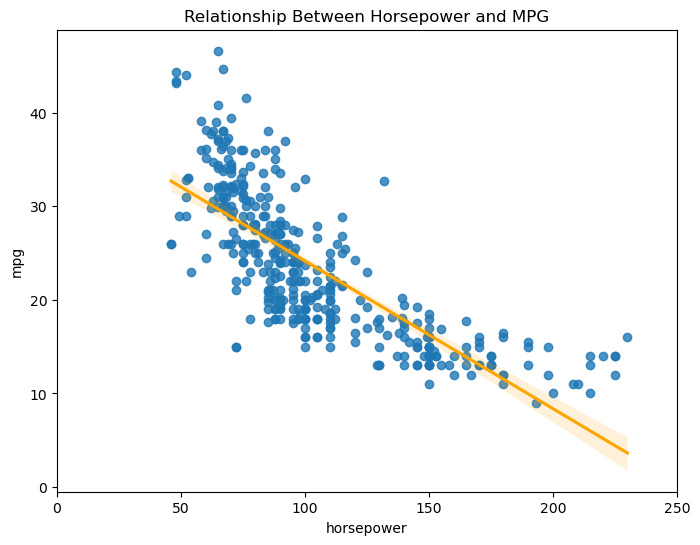

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- Cost Function/Loss Function
- Smallest cost/error will be the coefs for our line of best fit
- Finding parameter value with minimum value (bottom of the slope)

### 2) Imagine that you're starting at a slope towards the top upper left corner. Describe how gradient descent would work.

#### Answer: 

- At that particular we find the gradient (partial derivative). We are then going to take a step down towards our minimum. We repeat this process until we have reached our minimum. Gradient determines step size. 


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

#### Answer: 

- Step size as reflection of how far away you are from minimum. Further away = larger steps, closer = smaller steps. Learning rate is proportion of partial derivative that you want to take. 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- Target: Classification (binary or multi-class); target is categorical 
- Predictions: Log-odds translated into probabilities using logit function
- Difference: Linear predicts continuous, logistic is bound by 0, 1 
- Parametric: Model is calculated optimum coefficients (Model is determining parameters for you)


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- Benefits: More interpretable (provide coefficients which can be spoken in manner of y), small fitting time, not super prone to over fitting compated to decision tree, can give us probabilities for classes (more fine tuned confidence)
- Want to use other model: Logistic regression lienar, doesn't handle multi-class well as other algorithms; doesn't handle class imbalance well by default (think threshold being .5)


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [7]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns=['target'])
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [8]:
# Scale the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) 
X_test_scaled = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [10]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [11]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- 195 cars are not American, 67 cars are American; imbalanced target


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Always return the most common class--in this case, would always return 0


#### Part 3: How accurate would that baseline be on test data?


In [ ]:
# Code to find the answer


#### Answer:

- Accuracy of .74 (correct 74% of the time by guessing the majority class)


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

#### Answer:

- Our target is imbalanced.
- SMOTE: oversampling minority or undersampling majority: based on our small sample size, we want to avoid oversampling so we could over sample our 1s
- Adjust class_weights

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [12]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X=X_train_scaled, y=y_train)

LogisticRegression(random_state=42)

In [14]:
%matplotlib inline

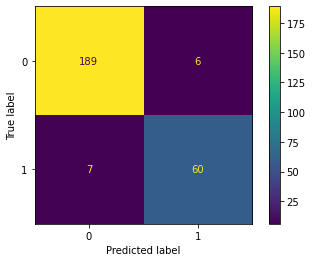

In [15]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_train_scaled, y_train);

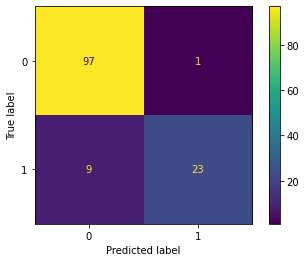

In [16]:
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [26]:
#Can set y_preds before
y_pred = logreg.predict(X_test_scaled)

In [27]:
# Accuracy
#Correct predictions/all predictions
# (23 + 97)/ (23+97+9+1)
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.9230769230769231

In [28]:
# Precision
# TP/(TP+FP)
# 23 / (23+1)
model_precision = precision_score(y_test, y_pred)
model_precision

0.9583333333333334

In [29]:
# Recall
#TP/(TP+FN)
# 23 / (23+9)
model_recall = recall_score(y_test, y_pred)
model_recall

0.71875

In [31]:
# F1-Score
# 2* (Precision * Recall) / (Precision + Recall)
model_f1 = f1_score(y_test, y_pred)
model_f1

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [33]:
probs= logreg.predict_proba(X_test_scaled)
probs

array([[9.97117884e-01, 2.88211554e-03],
       [9.95334221e-01, 4.66577929e-03],
       [9.99860889e-01, 1.39110635e-04],
       [9.97699595e-01, 2.30040460e-03],
       [9.99634518e-01, 3.65481656e-04],
       [9.99043618e-01, 9.56382448e-04],
       [2.79904115e-03, 9.97200959e-01],
       [9.99026897e-01, 9.73103080e-04],
       [9.33336333e-01, 6.66636668e-02],
       [9.99464221e-01, 5.35778541e-04],
       [8.93497133e-03, 9.91065029e-01],
       [9.57162834e-01, 4.28371664e-02],
       [1.54609949e-01, 8.45390051e-01],
       [9.98638756e-01, 1.36124411e-03],
       [9.11830111e-01, 8.81698888e-02],
       [9.99686066e-01, 3.13933548e-04],
       [9.39695786e-01, 6.03042137e-02],
       [9.99734687e-01, 2.65313401e-04],
       [9.99421021e-01, 5.78978925e-04],
       [9.99475392e-01, 5.24607746e-04],
       [8.74667951e-01, 1.25332049e-01],
       [9.99923819e-01, 7.61806157e-05],
       [9.99914240e-01, 8.57600530e-05],
       [1.32938166e-01, 8.67061834e-01],
       [9.993896

In [34]:
#want to pull out 2nd column from all of the rows
probs[:,1]

array([2.88211554e-03, 4.66577929e-03, 1.39110635e-04, 2.30040460e-03,
       3.65481656e-04, 9.56382448e-04, 9.97200959e-01, 9.73103080e-04,
       6.66636668e-02, 5.35778541e-04, 9.91065029e-01, 4.28371664e-02,
       8.45390051e-01, 1.36124411e-03, 8.81698888e-02, 3.13933548e-04,
       6.03042137e-02, 2.65313401e-04, 5.78978925e-04, 5.24607746e-04,
       1.25332049e-01, 7.61806157e-05, 8.57600530e-05, 8.67061834e-01,
       6.10344912e-04, 3.70596692e-03, 3.16963718e-02, 3.55067473e-01,
       7.97034531e-04, 8.03000867e-03, 9.47397282e-01, 2.14512246e-02,
       2.14283145e-01, 5.59151712e-04, 9.81588597e-01, 6.04199292e-05,
       9.65393863e-01, 2.39633260e-03, 9.66323397e-01, 9.99312202e-01,
       9.25243170e-01, 1.12718485e-03, 5.35187366e-05, 1.74465054e-03,
       9.67079081e-01, 9.98817896e-01, 2.81251779e-01, 1.54823217e-04,
       3.73172409e-03, 3.01269772e-04, 9.81312227e-01, 9.71495990e-03,
       7.19653335e-03, 1.70555661e-04, 4.01109500e-03, 3.35217499e-01,
      

In [35]:
probs = probs[:,1]

In [36]:
# Calculate roc-auc
roc_auc_score(y_test, probs)

0.9811862244897959

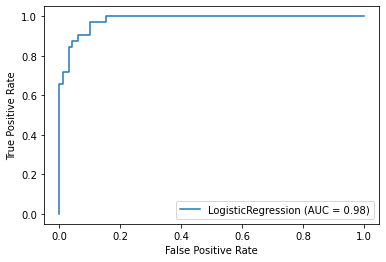

In [37]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

#### Answer:

-  Accuracy is 92%, improvement over baseline. Precision higher than recall (avoiding FP). More FNs than FPS. Model is correctly predicting our true class 92% of the time. 


## Part 4: Decision Trees

### Set Up


| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

#### Answer:

- Better split = more pure split
- Version 1 does a better job (lower combined gini score)
- Entropy ie Information Gain could be looked at instead of gini (lower entropy=better)

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [39]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

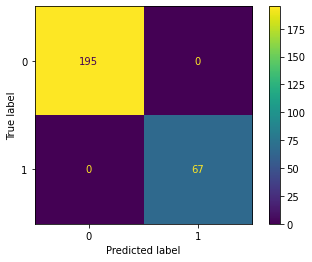

In [42]:
plot_confusion_matrix(dt, X_train, y_train)

In [44]:
dt.score(X_train, y_train)

1.0

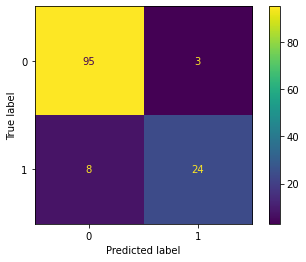

In [40]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

In [45]:
dt.score(X_test, y_test)

0.9153846153846154

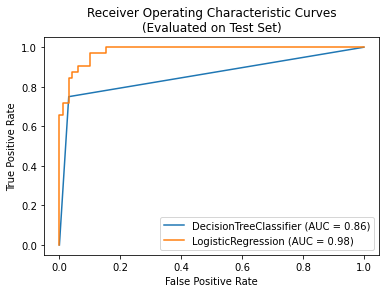

In [46]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

#### Answer:

- Logistic Regression model is better; it has a higher AUC.
